# **Modelling and Evaluation**

## Objectives

* Answer Business Requirement 2:
    * The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs

* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/train
* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/validation
* /workspace/mildew-detection-in-cherry-leaves/inputs/datasets/raw/cherry-leaves/test
* image shape embeddings.

## Outputs

* Images distribution plot in train, validation and test sets.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.
* Save model.
* Learning curve plot for model performance.
* Model evaluation on pickle file.
* Prediction on a random image file.

## Additional Comments | Insights | Conclusions


---



---

# Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from matplotlib.image import imread

---

### Set working directory

In [2]:
cwd = os.getcwd()
cwd

'/workspace/mildew-detection-in-cherry-leaves/jupyter_notebooks'

In [3]:
os.chdir(os.path.dirname(cwd))
print("You set a new current directory")

You set a new current directory


In [4]:
working_dir = os.getcwd()
working_dir

'/workspace/mildew-detection-in-cherry-leaves'

---

### Set input directories

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/datasets/raw/cherry-leaves'
train_path = os.path.join(my_data_dir, 'train')
val_path = os.path.join(my_data_dir, 'validation')
test_path = os.path.join(my_data_dir, 'test')

### Set output directory

In [6]:
version = 'v2'
file_path = os.path.join('outputs', version)

if 'outputs' in os.listdir(working_dir) and version in os.listdir(os.path.join(working_dir, 'outputs')):
    print('Old version is already available. Create a new version')
    pass
else:
    os.makedirs(name=file_path)

Old version is already available. Create a new version


### Set label names

In [7]:
labels = os.listdir(train_path)
print('Labels for the images are', labels)

Labels for the images are ['healthy', 'powdery_mildew']


### Set image shape

In [8]:
import joblib

image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(256, 256, 3)

---

## Images Distribution in Train, Validation and Test datasets

### Image Distribution Bar Figure

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images




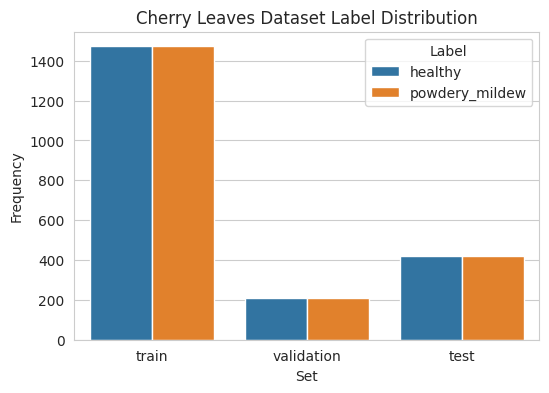

In [9]:
df_freq = pd.DataFrame([])
for folder in ['train', 'validation', 'test']:
    for label in labels:
        df_freq = df_freq.append(
            pd.Series(data={'Set': folder,
                            'Label': label,
                            'Frequency': int(len(os.listdir(os.path.join(my_data_dir, folder, label))))}
                      ),
            ignore_index=True
        )

        print(
            f"* {folder} - {label}: {len(os.listdir(os.path.join(my_data_dir, folder, label)))} images")

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
plt.title('Cherry Leaves Dataset Label Distribution')
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Image Distribution Pie Figure

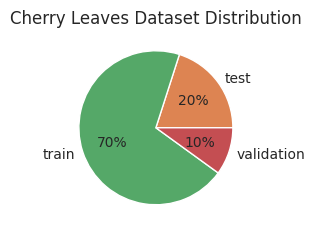

In [10]:
folders = os.listdir(my_data_dir)
data = []

# Iterating through folders and labels
for folder in folders:
    n = 0  # Initialize count
    for label in labels:
        # Get the number of files in each subdirectory
        n += len(os.listdir(os.path.join(my_data_dir, folder, label)))
    data.append(n)

# Plotting the pie chart
px = 1 / plt.rcParams['figure.dpi']
plt.subplots(figsize=(800 * px, 250 * px))
colors = sns.color_palette('deep')[1:6]
plt.pie(data, labels=folders, colors=colors, autopct='%.0f%%')
plt.title('Cherry Leaves Dataset Distribution')
plt.savefig(f'{file_path}/sets_distribution_pie.png', bbox_inches='tight', dpi=150)
plt.show()


---

## Image Data Augmentation

### ImageDataGenerator

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

* ### Initialise ImageDataGenerator

In [12]:
augmented_image_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

* ### Augment training image dataset

In [13]:
BATCH_SIZE = 20 # set batch size

train_data = augmented_image_data.flow_from_directory(train_path,
                                                      target_size=image_shape[:2],
                                                      color_mode='rgb',
                                                      batch_size=BATCH_SIZE,
                                                      class_mode='binary',
                                                      shuffle=True
                                                      )

train_data.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

* ### Augment validation image dataset

In [14]:
validation_data = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                         target_size=image_shape[:2],
                                                                         color_mode='rgb',
                                                                         batch_size=BATCH_SIZE,
                                                                         class_mode='binary',
                                                                         shuffle=False
                                                                         )

Found 420 images belonging to 2 classes.


* ### Augment test image dataset

In [15]:
test_data = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                   target_size=image_shape[:2],
                                                                   color_mode='rgb',
                                                                   batch_size=BATCH_SIZE,
                                                                   class_mode='binary',
                                                                   shuffle=False
                                                                   )

Found 844 images belonging to 2 classes.


* ### Plot augmented training image

(20, 256, 256, 3)


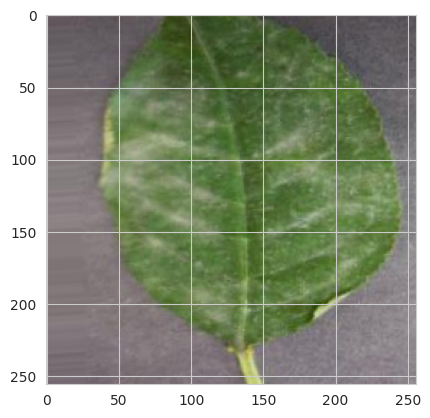

(20, 256, 256, 3)


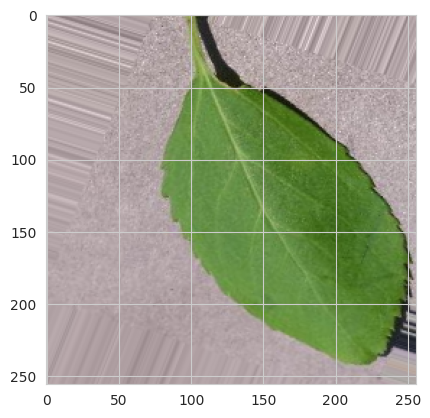

(20, 256, 256, 3)


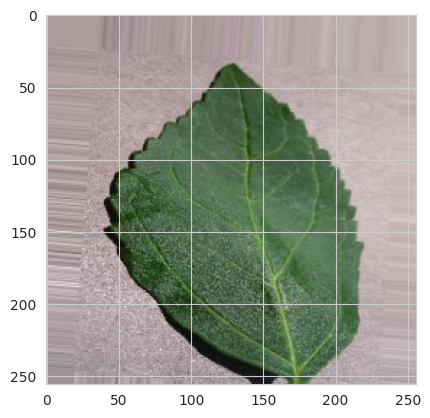

(20, 256, 256, 3)


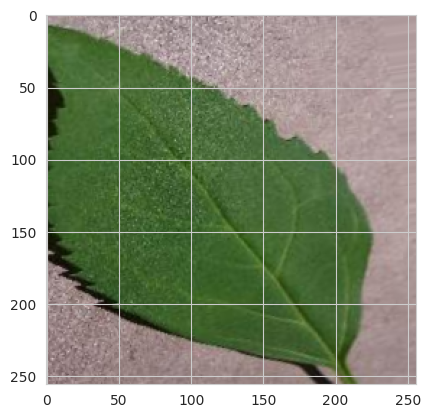

(20, 256, 256, 3)


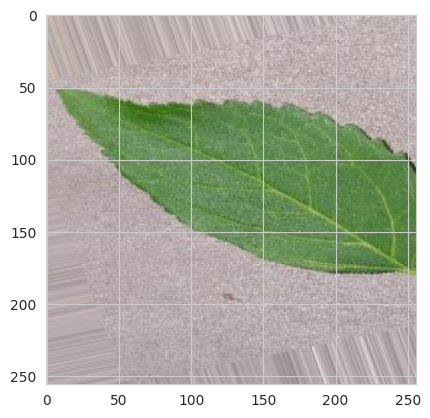

In [16]:
for i in range(5):
    img, label = train_data.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

* ### Plot augmented validation and test images

(20, 256, 256, 3)


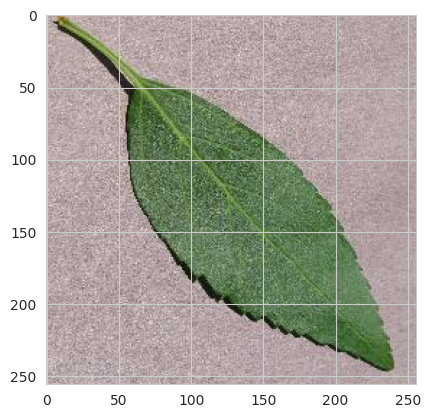

(20, 256, 256, 3)


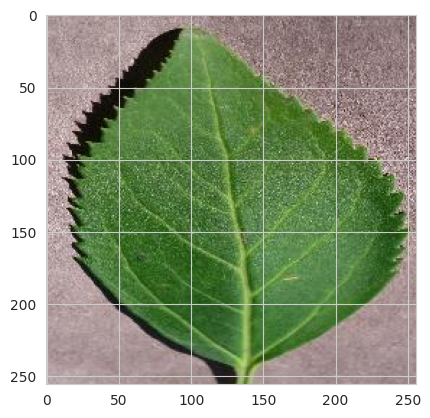

(20, 256, 256, 3)


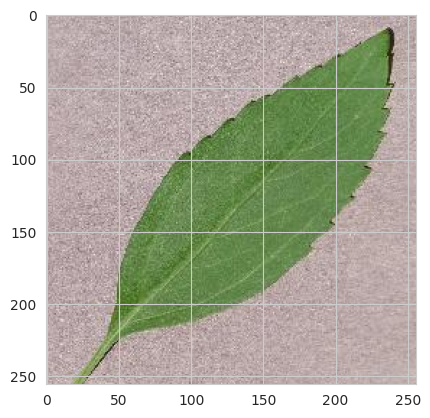

(20, 256, 256, 3)


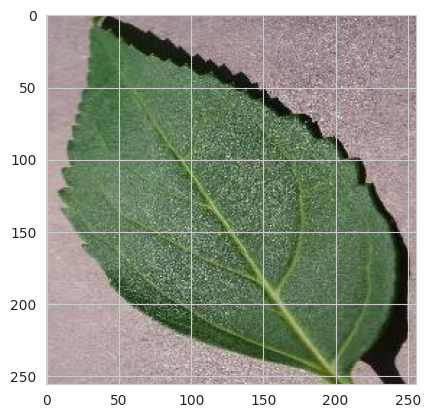

(20, 256, 256, 3)


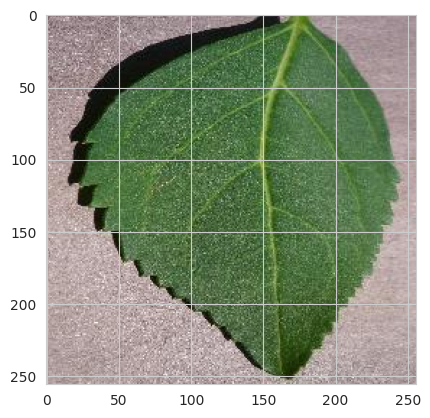

In [17]:
for i in range(5):
    img, label = validation_data.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

(20, 256, 256, 3)


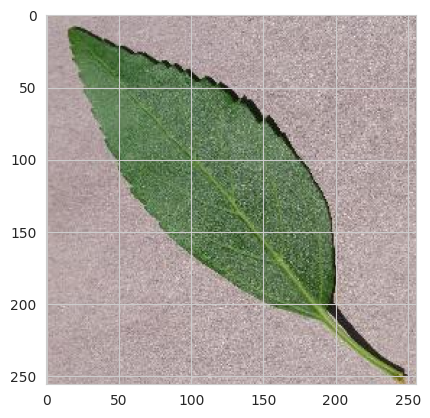

(20, 256, 256, 3)


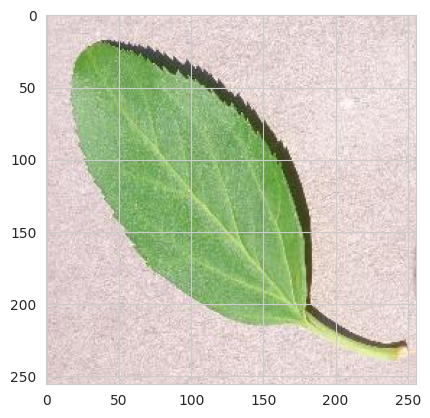

(20, 256, 256, 3)


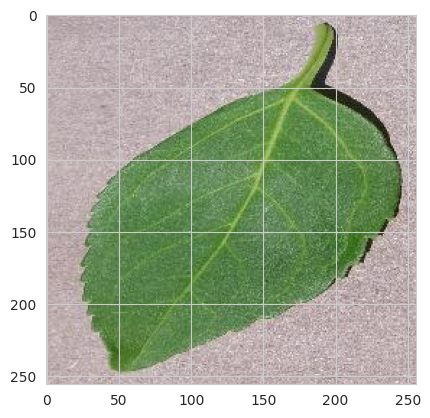

(20, 256, 256, 3)


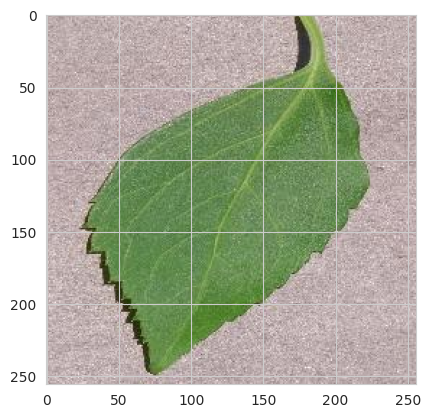

(20, 256, 256, 3)


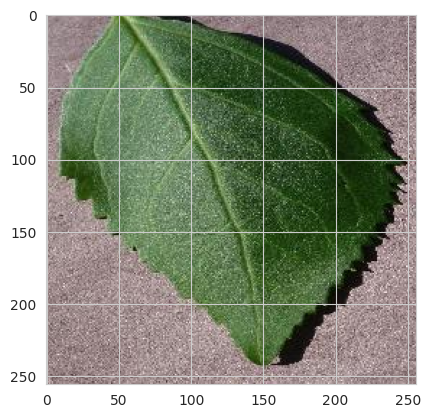

In [18]:
for i in range(5):
    img, label = test_data.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Save class_indices

In [19]:
joblib.dump(value=train_data.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

---

# Model Creation

---

## ML model

* ### Import model packages


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import RMSprop, Adagrad
from tensorflow.keras.regularizers import l2

* ### Model

In [21]:
def create_tf_model():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(filters=32, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third Convolutional Block
    model.add(Conv2D(filters=64, kernel_size=(3, 3),
                     input_shape=image_shape, activation='relu', ))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))


    # Flatten and Dense Layers
    model.add(Flatten())
    model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy',
                  optimizer='adagrad',
                  metrics=['accuracy'])
    
    return model

* ### Model Summary

In [22]:
create_tf_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 254, 254, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 125, 125, 64)      256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        3

2024-09-22 14:59:34.183692: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


* ### Early Stopping/Callbacks

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

m_checkpoint = ModelCheckpoint(
    filepath='outputs/v2/mildew_detection_model_{epoch:02d}_{val_accuracy:.4f}.h5',  # Save with epoch and val_accuracy in the filename
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Save when accuracy improves
    save_best_only=True,  # Only save the best model to avoid multiple files
    save_weights_only=False,  # Save the entire model (architecture + weights)
    verbose=1  # Verbosity to show when saving happens
)


### Fit model for model training

In [25]:
model = create_tf_model()
history = model.fit(train_data,
          epochs=25,
          steps_per_epoch=len(train_data.classes) // BATCH_SIZE,
          validation_data=validation_data,
          callbacks=[early_stop, reduce_lr, m_checkpoint],
          verbose=1
          )

2024-09-22 15:01:08.406938: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25
147/147 [==============================] - 469s 3s/step - loss: 0.2370 - accuracy: 0.9617 - val_loss: 2.9363 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to outputs/v2/mildew_detection_model_01_0.5000.h5
Epoch 2/25
147/147 [==============================] - 468s 3s/step - loss: 0.1627 - accuracy: 0.9873 - val_loss: 2.6381 - val_accuracy: 0.5167

Epoch 00002: val_accuracy improved from 0.50000 to 0.51667, saving model to outputs/v2/mildew_detection_model_02_0.5167.h5
Epoch 3/25
147/147 [==============================] - 466s 3s/step - loss: 0.1513 - accuracy: 0.9921 - val_loss: 0.2229 - val_accuracy: 0.9643

Epoch 00003: val_accuracy improved from 0.51667 to 0.96429, saving model to outputs/v2/mildew_detection_model_03_0.9643.h5
Epoch 4/25
147/147 [==============================] - 472s 3s/step - loss: 0.1476 - accuracy: 0.9942 - val_loss: 0.1449 - val_accuracy: 0.9976

Epoch 00004: val_accuracy improved from 0.96429 to 0.99762

### Save model

In [26]:
model.save('outputs/v2/mildew_detection_model.h5')

---

## Model Performance

---

### Model Learning Curve - A

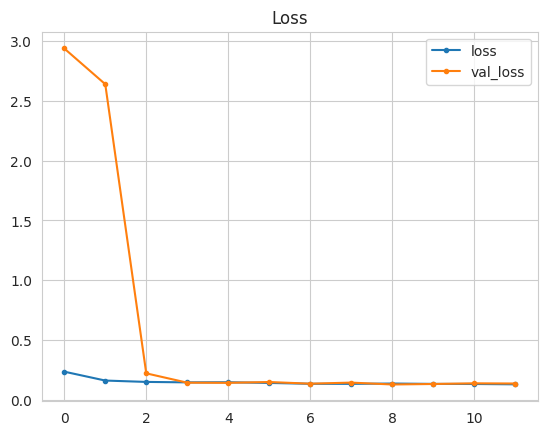

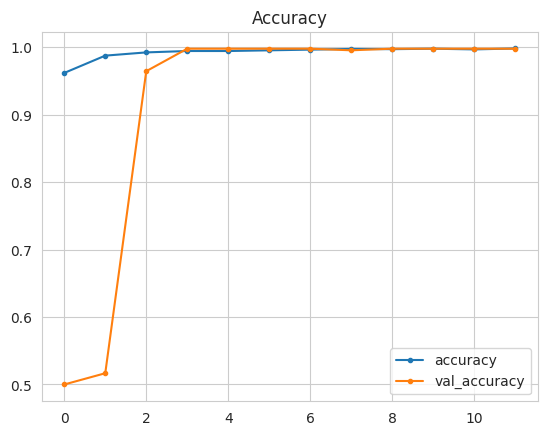

In [27]:
losses = pd.DataFrame(model.history.history)

sns.set_style("whitegrid")
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.savefig(f'{file_path}/model_training_losses.png',
            bbox_inches='tight', dpi=150)
plt.show()

print("\n")
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.savefig(f'{file_path}/model_training_accuracy.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Model Learning Curve - B

In [ ]:
pd.DataFrame(model.history.history).plot(figsize=(8, 5))

plt.savefig(f'{file_path}/model_loss_accuracy.png',
            bbox_inches='tight', dpi=150)

plt.show()

### Model Learning Curve - C

In [28]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter( y=model.history.history['val_loss'], name="val_loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=model.history.history['loss'], name="loss"),
    secondary_y=False,
)
fig.add_trace(
    go.Scatter( y=model.history.history['val_accuracy'], name="val accuracy"),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter( y=model.history.history['accuracy'], name="accuracy"),
    secondary_y=True,
)

fig.update_layout(
    title_text="Loss/Accuracy of LSTM Model"
)

fig.update_xaxes(title_text="Epoch")

fig.update_yaxes(title_text="<b>primary</b> Loss", secondary_y=False)
fig.update_yaxes(title_text="<b>secondary</b> Accuracy", secondary_y=True)

fig.update_layout(
    autosize=False,
    width=800, 
    height=500, 
    )

fig.show()
fig.write_image(f'{file_path}/model_history.png')

---

## Model Evaluation

### Import Packages

In [29]:
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

### Load saved model

In [30]:
from keras.models import load_model
model = load_model('outputs/v2/mildew_detection_model.h5')

### Accuracy
Aims:
* Evaluation of the model on the test set.
* Confirm that the performance on the test set meets the requirements of at least 65% accuracy and answers Business Requirement 2.

In [31]:
evaluation = model.evaluate(test_data, batch_size=BATCH_SIZE)
print("Model Accuracy: {:.2f}%".format(evaluation[1] * 100))
print("Model Loss: ", evaluation[0])

43/43 [==============================] - 27s 621ms/step - loss: 0.1318 - accuracy: 0.9988
Model Accuracy: 99.88%
Model Loss:  0.1317577064037323


### Set accuracy variables

In [32]:
validation_data.reset()

x_true, y_true = next(test_data)
preds = np.argmax(model.predict(test_data), axis=1)
y_pred = np.rint(preds)
y_true = test_data.labels

### ROC Curve

Area Under ROC-Curve:  0.5


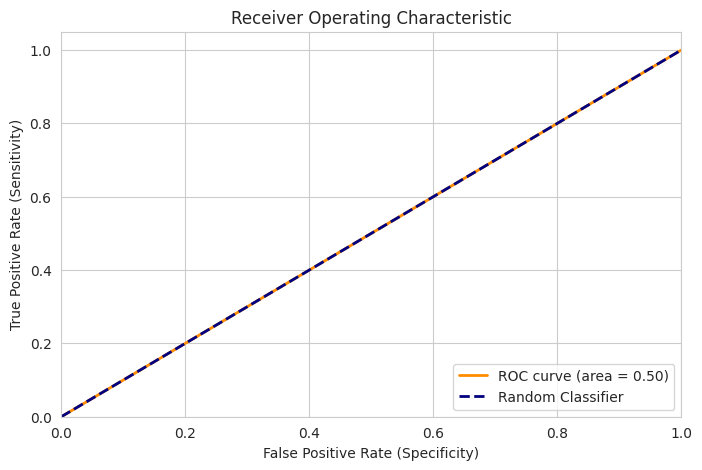

In [33]:
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score

sns.set_style("whitegrid")
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, label="Random Classifier", linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(f'{file_path}/roccurve.png',
            bbox_inches='tight', dpi=150)
print('Area Under ROC-Curve: ', roc_auc_score(y_true, y_pred))
plt.show()

### Confusion Matrix

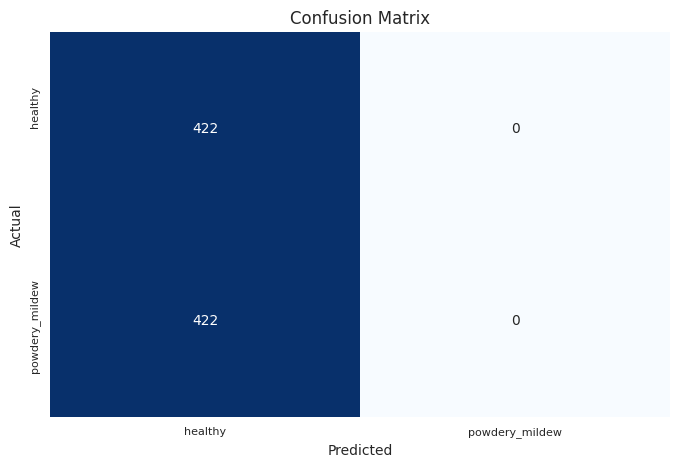

In [35]:
cm = confusion_matrix(y_true,y_pred)

classes=list(test_data.class_indices.keys()) 
length=len(classes)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, classes, rotation= 0, fontsize=8)
plt.yticks(np.arange(length)+.3, classes, rotation=90, fontsize=8)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig(f'{file_path}/confusion_matrix.png',
            bbox_inches='tight', dpi=150)
plt.show()

### Classification Report - A

In [36]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [37]:
print('Classification Report:\n----------------------\n')
print(classification_report(y_true, y_pred, target_names=labels))

Classification Report:
----------------------

                precision    recall  f1-score   support

       healthy       0.50      1.00      0.67       422
powdery_mildew       0.00      0.00      0.00       422

      accuracy                           0.50       844
     macro avg       0.25      0.50      0.33       844
  weighted avg       0.25      0.50      0.33       844



### Classification Report - B

Text(0.5, 1.0, 'Classification Report')

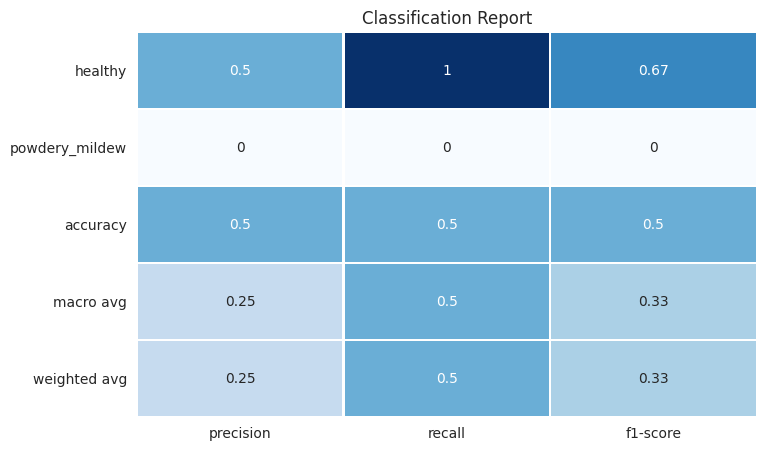

In [38]:
import matplotlib as mpl
clf_report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, cmap="Blues", cbar=False, linewidths=1)
plt.title('Classification Report')

### Classification Report - C

NameError: name 'vmin' is not defined

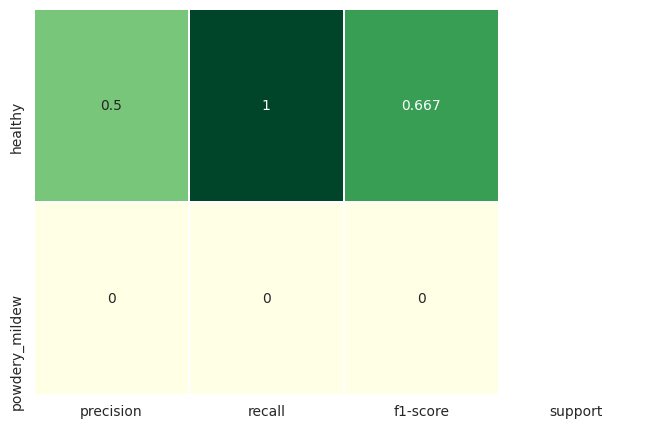

In [40]:
import matplotlib as mpl
import pathlib

def plot_classification_report(y_test, y_pred, title='Classification Report', save_fig_path=None, **kwargs):

    fig, ax = plt.subplots(figsize=(8,5))

    clf_report = classification_report(y_true, y_pred, output_dict=True, **kwargs)
    keys_to_plot = [key for key in clf_report.keys() if key not in ('accuracy', 'macro avg', 'weighted avg')]
    df = pd.DataFrame(clf_report, columns=keys_to_plot).T
    # The following line ensures that DataFrame is sorted from the majority classes to the minority classes
    df.sort_values(by=['support'], inplace=True)

    # Mask the 'support' column and plot the heatmap
    rows, cols = df.shape
    mask = np.zeros(df.shape)
    mask[:,cols-1] = True

    ax = sns.heatmap(df, mask=mask, annot=True, cmap='YlGn', fmt='.3g', cbar=False,
                     vmin=0.0,
                     vmax=1.0,
                     linewidths=.4, linecolor='white')
    
    mask = np.zeros(df.shape)
    mask[:,:cols-1] = True

    ax = sns.heatmap(df, mask=mask, annot=True, cmap='YlGn', cbar=False,
                     linewidths=2, linecolor='white', fmt=',0f',
                     vmin=df['support'].min(),
                     vmax=df['support'].sum(),
                     norm=mpl.colors.Normalize(vmin['support'].min(),
                                               vmax=df['support'].sum())
                    )
    
    plt.title(title)
    plt.ytick(np.arrange(length)+.2, classes, rotation=90)

    if (save_fig_path != None):
        path = pathlib.Path(save_fig_path)
        path.parent.mkdir(parents=True, exist_ok=True)
        fig.savefig(save_fig_path)
    
    return fig, ax

fig, ax = plot_classification_report(y_true, y_pred,
                                     title='Classification Report',
                                     target_names=labels,
                                     save_fig_path = f'{file_path}/clf_report.png')

### Save Evaluation Pickle

In [41]:
joblib.dump(value=evaluation,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

---

## Predict on New Data

### Load Random Image as PIL

Image shape: (256, 256), Image mode: RGB


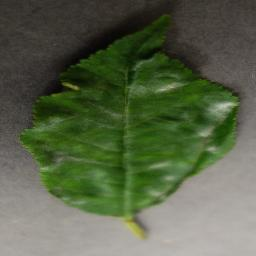

In [42]:
from tensorflow.keras.preprocessing import image

pointer = 32
label = labels[1] # select 0 for 'healthy' and '1' for 'powdery mildew'

pil_image = image.load_img(test_path + '/' + label + '/' + os.listdir(test_path+'/' + label)[pointer],
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

### Convert Image to Array for Prediction

In [43]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 256, 256, 3)


### Predict Class Probabilities

In [45]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_data.class_indices.items()}
pred_class = target_map[pred_proba < 0.5]

if pred_class == target_map[1]:
    pred_proba = 1 - pred_proba

print(f"{pred_class} {round(pred_proba*100, 2)}%")


healthy 100.0%
